In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Datasets
#### Alocação da informação dos datasets de treino e de teste em variaveis, e representação da quantidade de atributos (linhas), features (colunas) que cada dataset possui

In [2]:
data_train = pd.read_csv('TpInfo/train_radiomics_hipocamp.csv')
data_test = pd.read_csv('TpInfo/test_radiomics_hipocamp.csv')
data_control = pd.read_csv('TpInfo/train_radiomics_occipital_CONTROL.csv')
print("data_train:",data_train.shape)
print("data_test:",data_test.shape)
print("data_control:",data_control.shape)

data_train: (305, 2181)
data_test: (100, 2180)
data_control: (305, 2181)


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2181 entries, ID to Transition
dtypes: float64(2014), int64(147), object(20)
memory usage: 5.1+ MB


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 2180 entries, ID to Age
dtypes: float64(2011), int64(150), object(19)
memory usage: 1.7+ MB


In [5]:
data_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2181 entries, ID to Transition
dtypes: float64(2014), int64(147), object(20)
memory usage: 5.1+ MB


### Número de Ocorrência por Categoria (dataset de treino)

#### Como as categorias não estão uniformemente distribuídas é um dataset não balanceado

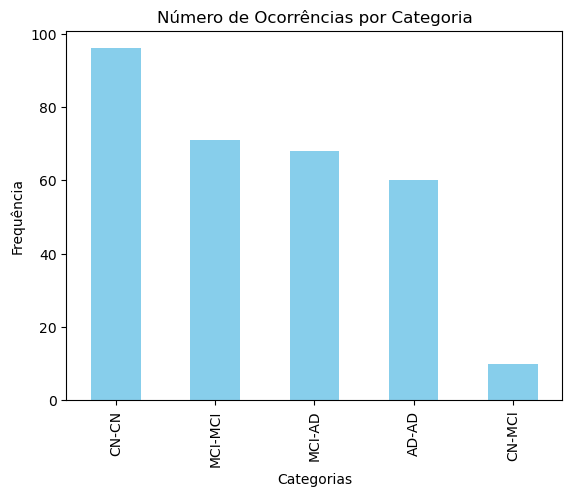

In [6]:
contagem = data_control["Transition"].value_counts()

contagem.plot(kind="bar", color="skyblue")
plt.title("Número de Ocorrências por Categoria")
plt.xlabel("Categorias")
plt.ylabel("Frequência")
plt.show()

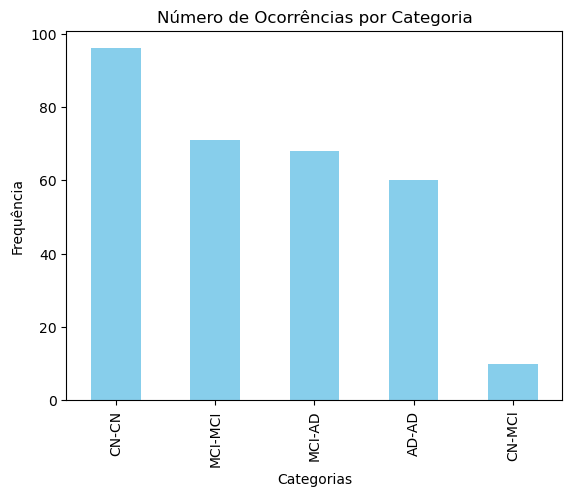

In [7]:
contagem = data_train["Transition"].value_counts()

contagem.plot(kind="bar", color="skyblue")
plt.title("Número de Ocorrências por Categoria")
plt.xlabel("Categorias")
plt.ylabel("Frequência")
plt.show()

## Data Preparation

### Duplicated Values
#### Verificar se os datasets têm valores em falta

In [8]:
data_train.duplicated().sum()# Verifies missing values
NAs = pd.concat([data_train.isnull().sum()], axis=1, keys=['Colunas com valores em falta'])
NAs[NAs.sum(axis=1) > 0]

,Colunas com valores em falta


In [9]:
data_test.duplicated().sum()# Verifies missing values
NAs = pd.concat([data_train.isnull().sum()], axis=1, keys=['Colunas com valores em falta'])
NAs[NAs.sum(axis=1) > 0]

,Colunas com valores em falta


In [10]:
data_control.duplicated().sum()# Verifies missing values
NAs = pd.concat([data_train.isnull().sum()], axis=1, keys=['Colunas com valores em falta'])
NAs[NAs.sum(axis=1) > 0]

,Colunas com valores em falta


### Constant Values

#### Verificar se os datasets têm colunas com valores constantes ao longo das linhas 

In [11]:
# Selects columns with more than one value (têm ambos o mesmo número de colunas com valores únicos)
data_train = data_train.loc[:, data_train.nunique() > 1]
data_test = data_test.loc[:, data_test.nunique() > 1]
data_control = data_control.loc[:, data_control.nunique() > 1]

### Duplicated Values

#### Verificar se os datasets têm linhas duplicadas:

In [12]:
dup_train = data_train.duplicated().sum()
dup_test = data_test.duplicated().sum()
dup_control = data_control.duplicated().sum()
print("dup_train:",dup_train)
print("dup_test:",dup_test)
print("dup_control:",dup_control)

dup_train: 0
dup_test: 0
dup_control: 0


### Features Categóricas

#### Train Dataset

In [13]:
features_categoricas_train = data_train.select_dtypes(include=['object']).columns
output = pd.DataFrame(features_categoricas_train, columns=['Features Categóricas'])
output

,Features Categóricas
0,ID
1,Image
2,Mask
3,diagnostics_Image-original_Hash
4,diagnostics_Mask-original_Hash
5,diagnostics_Mask-original_BoundingBox
6,diagnostics_Mask-original_CenterOfMassIndex
7,diagnostics_Mask-original_CenterOfMass
8,Transition


#### Test Dataset

In [14]:
features_categoricas_test = data_test.select_dtypes(include=['object']).columns
output = pd.DataFrame(features_categoricas_test, columns=['Features Categóricas'])
output

,Features Categóricas
0,ID
1,Image
2,Mask
3,diagnostics_Image-original_Hash
4,diagnostics_Mask-original_Hash
5,diagnostics_Mask-original_BoundingBox
6,diagnostics_Mask-original_CenterOfMassIndex
7,diagnostics_Mask-original_CenterOfMass


#### Control Dataset

In [15]:
features_categoricas_control = data_control.select_dtypes(include=['object']).columns
output = pd.DataFrame(features_categoricas_control, columns=['Features Categóricas'])
output

,Features Categóricas
0,ID
1,Image
2,Mask
3,diagnostics_Image-original_Hash
4,diagnostics_Mask-original_Hash
5,diagnostics_Mask-original_BoundingBox
6,diagnostics_Mask-original_CenterOfMassIndex
7,diagnostics_Mask-original_CenterOfMass
8,Transition


#### Através da análise dos features categóricos o grupo reparou que cada feature não ia ter impacto no treino dos modelos o que nos levou à conclusão de que devia ser feito drop de todas as colunas categóricas excepto a target feature

In [16]:
# Drop columns with irrelevant information
data_train = data_train.drop(columns=['ID', 'Image', 'Mask', 'diagnostics_Image-original_Hash',
'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_CenterOfMassIndex', 'diagnostics_Mask-original_CenterOfMass'])

In [17]:
data_test = data_test.drop(columns=['ID', 'Image', 'Mask', 'diagnostics_Image-original_Hash',
'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_CenterOfMassIndex', 'diagnostics_Mask-original_CenterOfMass'])

In [18]:
data_control = data_control.drop(columns=['ID', 'Image', 'Mask', 'diagnostics_Image-original_Hash',
'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_CenterOfMassIndex', 'diagnostics_Mask-original_CenterOfMass'])

### Guardar os datasets num novo ficheiro csv

In [19]:
data_train.to_csv("train_radiomics_hipocamp_mod.csv", index=False)
data_test.to_csv("test_radiomics_hipocamp_mod.csv", index=False)
data_control.to_csv("train_radiomics_occipital_CONTROL_mod.csv", index=False)